In [172]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split ,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [173]:
df=pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [174]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [176]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [177]:
X=df.drop("Drug",axis=1)
y=df["Drug"]
numerical=[coulmn for coulmn in X.columns if X[coulmn].dtype!="object"]
categorical=[coulmn for coulmn in X.columns if X[coulmn].dtype=="object"]
X_numerical=X[numerical]


In [178]:
y.value_counts().sort_index()

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
Name: count, dtype: int64

In [179]:
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [180]:
df.describe(include=object)

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


<Axes: xlabel='Drug', ylabel='count'>

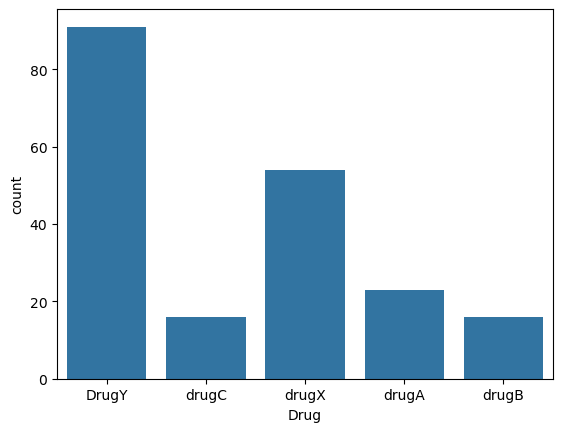

In [181]:
sns.countplot(x="Drug",data=df)

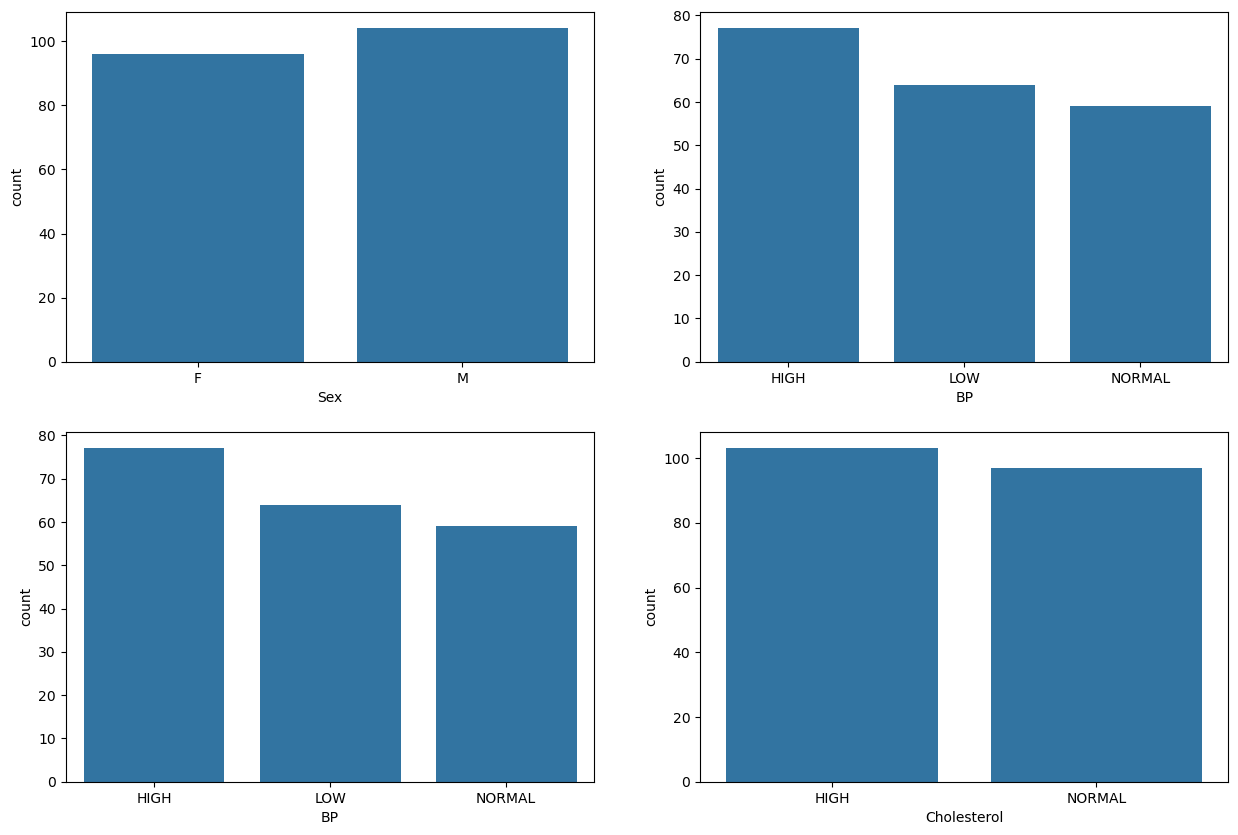

In [182]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
for i in range(2):
    for j in range(2):
        sns.countplot(x=categorical[i+j],data=df,ax=axes[i][j])



<Axes: xlabel='Na_to_K', ylabel='Drug'>

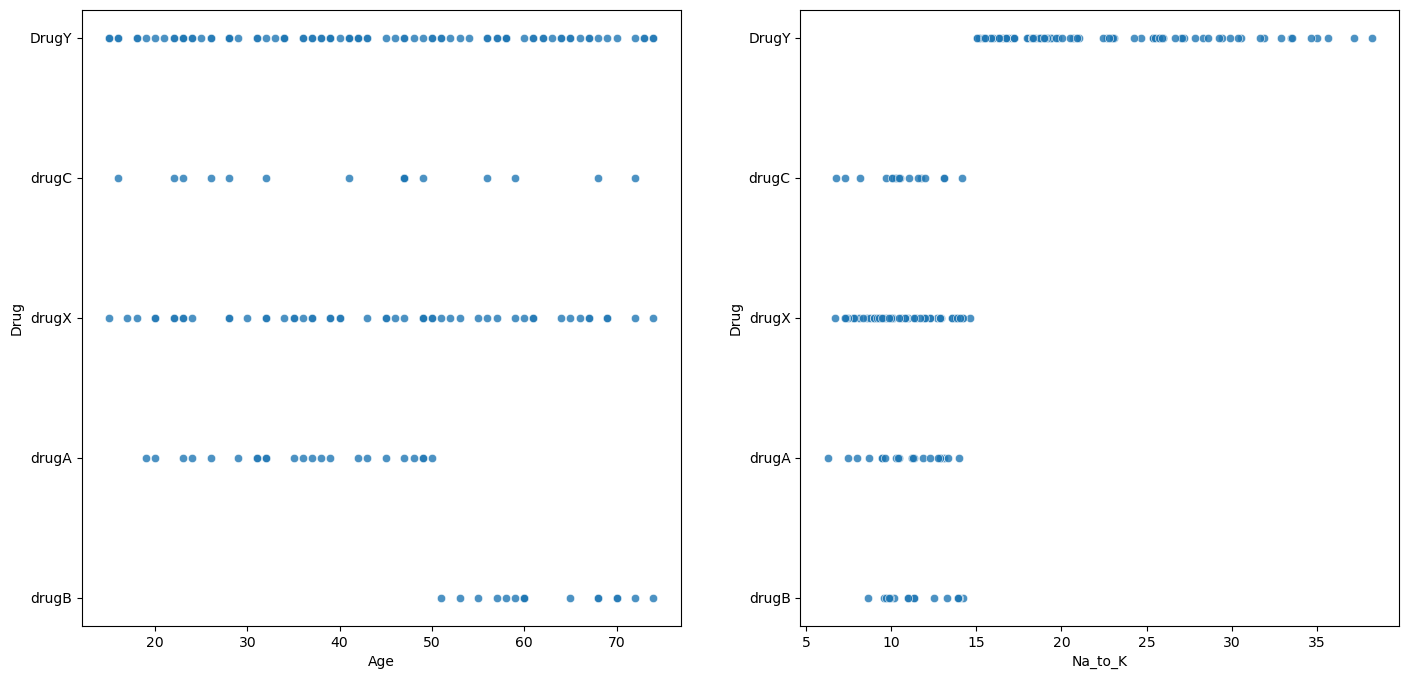

In [183]:
fig,axis=plt.subplots(1,2,figsize=(17,8))
sns.scatterplot(x=numerical[0],y='Drug',data=df,ax=axis[0],alpha=.8)
sns.scatterplot(x=numerical[1],y='Drug',data=df,ax=axis[1],alpha=.8)


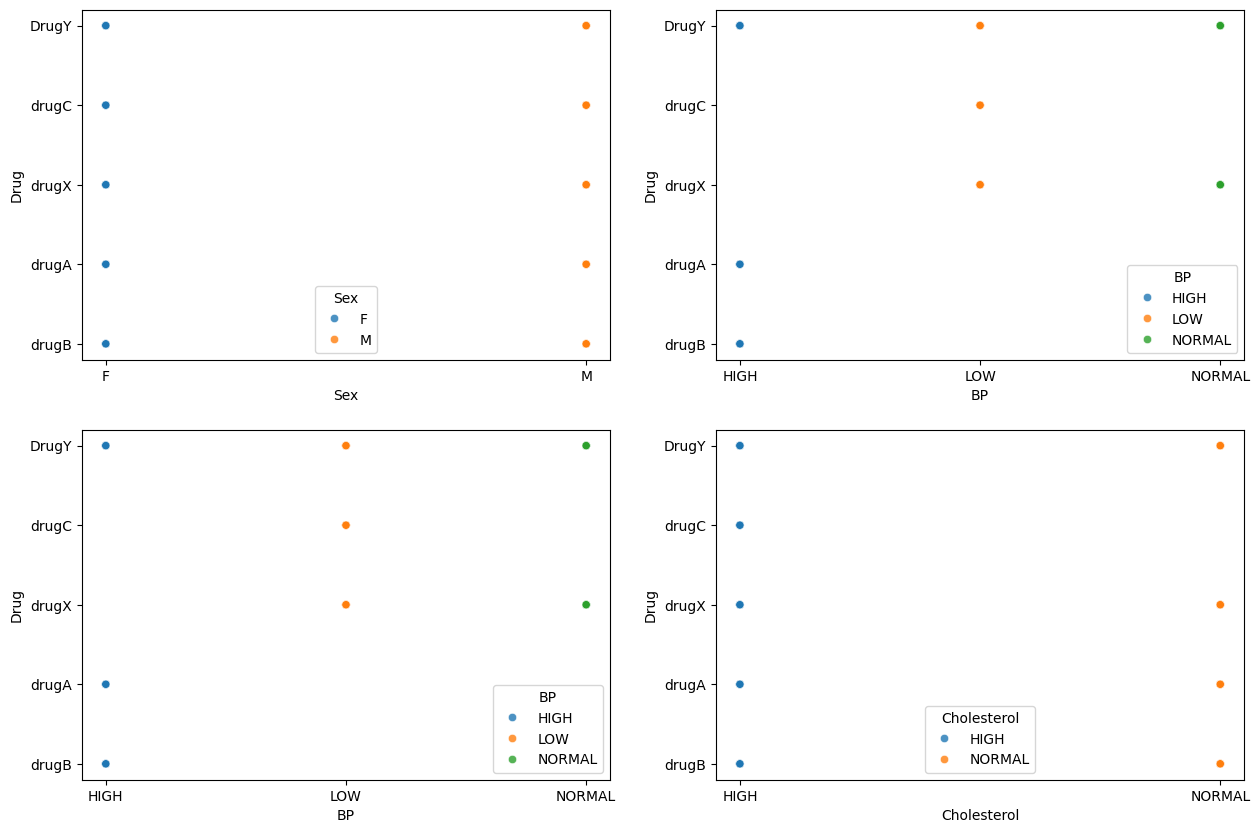

In [184]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
for i in range(2):
    for j in range(2):
        sns.scatterplot(x=categorical[i+j],y="Drug",data=df,hue=categorical[i+j],ax=axes[i][j],alpha=.8)

all CATEGORICAL features seems to be Ordinal (low,high) so we will do lapelencoding

In [185]:
transformation1=ColumnTransformer(transformers=[
    ('num',StandardScaler(),numerical),
    ('cat',OrdinalEncoder(),categorical)
])
transformation2=ColumnTransformer(transformers=[
    (LabelEncoder(),categorical)
])


In [186]:
# transformation1.fit_transform(X)

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=df["Drug"],test_size=.2)

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [189]:
pipe1=make_pipeline(transformation1,LogisticRegression())
pipe2=make_pipeline(transformation2,LogisticRegression())
print(np.mean(cross_val_score(pipe1,X_train,y_train)))
# print(np.mean(cross_val_score(pipe2,X_train,y_train)))



0.9125


In [193]:
from sklearn.metrics import balanced_accuracy_score,classification_report,confusion_matrix

In [199]:
pipe1=make_pipeline(transformation1,DecisionTreeClassifier(max_depth=4))
print(np.mean(cross_val_score(pipe1,X_train,y_train)))
pipe1.fit(X_train,y_train)
y_test_predicted=pipe1.predict(X_test)
print(pipe1.score(X_test,y_test))
confusion_matrix(y_test,y_test_predicted)


0.9875
1.0


array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)